<a href="https://colab.research.google.com/github/cosraj/learning_keras_with_tensorflow/blob/main/mnist_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install tensorflow


In [13]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.13.0'

In [14]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), ( X_test, y_test) = fashion_mnist.load_data()

In [15]:
print ( X_train_full )

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Let's scale the pixel intensities to a 0-1 scale since we will use gradient descent

In [16]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [17]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [18]:
class_names[y_train[9]]

'Coat'

Next, we have to build a sequential API
Here, the input is a batch of 28x28 images. In Keras, such multi dimensional arrays have to be flattened which is requirement for a dense layer where every neuron in a previous layer is connected to every other neuron in the next layer.



1.   First layer is a flatten layer which flattens the input images of 28*28 into a 1D array of 784
2.   Second layer is a dense layer of size 300 with activation function set to 300
3.   Third layer is another dense layer of size 100
4.   The final layer is of size 10 with an activation function of softmax as we need a multi classifier out ( one for each class type)



reshape(-1,1) : here -1 means we are telling numpy to determine the first dimension automatically while keeping the second dimension to a single column.

model.summary() -> Summary method lists all the layers with all the names. It also lists the parameters(weights of every edge in the network)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


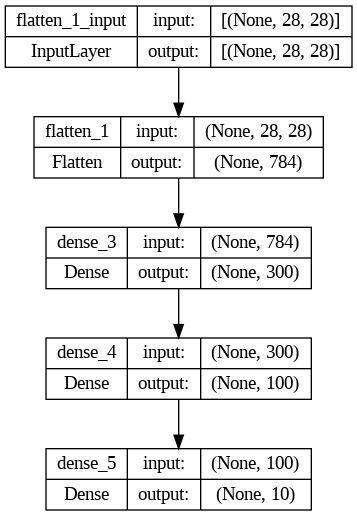

In [19]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(300,activation="relu"),
                         keras.layers.Dense(100,activation="relu"),
                         keras.layers.Dense(10,activation="softmax")])
model.summary()
model.layers
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


Summary() method shows parameters as well. Parameters are the weights between two connected layers which is usually a multiplication between the number of neurons in each layer + the bias terms

Remeber that all the weights are initially initialized with random values. This ensures that backpropagation works effectively.

In [20]:
model.layers
weights, biases = (model.layers[1].get_weights())
print(weights.shape)
print(biases)



(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Let's understand the terms here:
sparse -> This refers to the fact that each instance of test data will have only one output label as to which one of the 10 possible categories it belongs to. This is different from one-hot encoder or something similar where you have a value for each of the classes. If we had used one-hot encoder here, then we would have used "categorical_crossentropy"
cross_entropy -> Cross-entropy, specifically binary cross-entropy or categorical cross-entropy in machine learning, is a loss function used to measure the dissimilarity between two probability distributions: the predicted probability distribution produced by a model (neural network) and the true probability distribution (one-hot encoded labels)

Please note that the loss function classes like SparseCategoricalCrossEntroy, CategoricalCrossEntropy, BinaryCrossEntropy are the loss functions used in Classification MLP. For regression, we use different set of loss functions like MeanSquaredError,MeanAbsoluteError class and more
Link to Keras losses: [Keras losses](https://keras.io/api/losses/)

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7191 - accuracy: 0.7652 - val_loss: 0.5065 - val_accuracy: 0.8240
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4848 - accuracy: 0.8319 - val_loss: 0.4459 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4396 - accuracy: 0.8447 - val_loss: 0.4105 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4135 - accuracy: 0.8559 - val_loss: 0.3914 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3945 - accuracy: 0.8606 - val_loss: 0.3942 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3790 - accuracy: 0.8659 - val_loss: 0.3682 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3660 - accuracy: 0.8702 - val_loss: 0.3589 - val_accuracy

The history object returned by the fit method is a pandas dataframe. We can plot it pretty easily

As we can see, the training accuracy and the validation accuracy are in sync meaning there is no overfitting here.

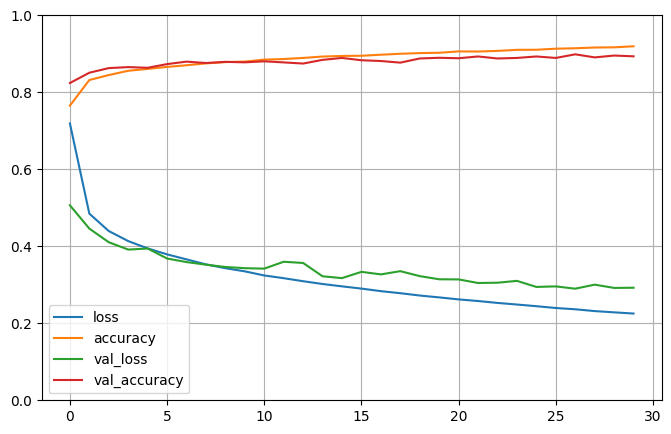

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

Now, let's do the evaluation of the model with the test data

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3370 - accuracy: 0.8800


[0.3370266556739807, 0.8799999952316284]

It is common for the evaluation accuracy to be lower than the validation accuracy since the hyperparameters are tuned for validation data. But, resist the temptation of tuning hyperparameters for evaluation to ensure the model is generalized enough.

Now, let's do some predictions. Since we don't have new data, let's use the first 10 test instances for prediction

In [25]:
y_proba = model.predict(X_test[:10])
y_proba.round(2)

1/1 [==============================] - 0s 104ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.01, 0.  , 0.01, 0.  , 0.93, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.93, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

As you can see, the output is array with 10 elements, each representing the probability of each of the 10 categories. Most probablities are above .9 which is good.